In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

from google.colab import drive

drive.mount('/content/drive/')

data = pd.read_csv("/content/drive/My Drive/Colab Notebooks/data.csv")
submission = pd.read_csv("/content/drive/My Drive/Colab Notebooks/sample_submission.csv")

Mounted at /content/drive/


In [2]:
data.drop('id', axis=1, inplace=True)
data

,f_00,f_01,f_02,f_03,f_04,f_05,f_06,f_07,f_08,f_09,...,f_19,f_20,f_21,f_22,f_23,f_24,f_25,f_26,f_27,f_28
0,-0.389420,-0.912791,0.648951,0.589045,-0.830817,0.733624,2.258560,2,13,14,...,-0.478412,-0.757002,-0.763635,-1.090369,1.142641,-0.884274,1.137896,1.309073,1.463002,0.813527
1,-0.689249,-0.453954,0.654175,0.995248,-1.653020,0.863810,-0.090651,2,3,6,...,-0.428791,-0.089908,-1.784204,-0.839474,0.459685,1.759412,-0.275422,-0.852168,0.562457,-2.680541
2,0.809079,0.324568,-1.170602,-0.624491,0.105448,0.783948,1.988301,5,11,5,...,-0.413534,-1.602377,1.190984,3.267116,-0.088322,-2.168635,-0.974989,1.335763,-1.110655,-3.630723
3,-0.500923,0.229049,0.264109,0.231520,0.415012,-1.221269,0.138850,6,2,13,...,0.619283,1.287801,0.532837,1.036631,-2.041828,1.440490,-1.900191,-0.630771,-0.050641,0.238333
4,-0.671268,-1.039533,-0.270155,-1.830264,-0.290108,-1.852809,0.781898,8,7,5,...,-1.628830,-0.434948,0.322505,0.284326,-2.438365,1.473930,-1.044684,1.602686,-0.405263,-1.987263
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97995,0.237591,1.657034,-0.689282,0.313710,-0.299039,0.329139,1.607378,5,7,8,...,-0.290116,-0.258141,-0.973640,1.369508,0.391055,2.152426,-0.208944,-1.475403,0.298448,0.445039
97996,0.322696,0.710411,0.562625,-1.321713,-0.357708,0.182024,0.178558,3,9,2,...,0.117687,1.388242,0.342400,1.680537,-0.860409,0.579165,1.162692,0.134994,0.994666,0.727642
97997,-0.249364,-0.459545,1.886122,-1.340310,0.195029,-0.559520,-0.379767,8,9,10,...,-0.850223,-1.787648,-1.268115,-1.508330,1.945622,1.503645,0.194968,2.142693,1.646042,0.641466
97998,0.311408,2.185237,0.761367,0.436723,0.464967,0.062321,-0.334025,1,8,11,...,-0.010839,1.118906,1.565765,0.358480,0.547615,1.224439,-0.537998,-1.610954,-0.616227,-0.066211


### EDA

In [ ]:
data.nunique()

f_00    98000
f_01    98000
f_02    98000
f_03    98000
f_04    98000
f_05    98000
f_06    98000
f_07       32
f_08       29
f_09       45
f_10       37
f_11       29
f_12       39
f_13       30
f_14    98000
f_15    98000
f_16    98000
f_17    98000
f_18    98000
f_19    98000
f_20    98000
f_21    98000
f_22    98000
f_23    98000
f_24    98000
f_25    98000
f_26    98000
f_27    98000
f_28    98000
dtype: int64

In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
f_00,98000.0,0.001220,1.002801,-4.732235,-0.675226,0.002022,0.677271,4.490521
f_01,98000.0,0.005580,1.000742,-4.202795,-0.670985,0.006650,0.677746,4.324974
f_02,98000.0,-0.001042,1.001373,-4.377021,-0.672779,-0.000324,0.677086,4.560247
f_03,98000.0,-0.000700,1.000422,-4.010826,-0.672540,-0.003185,0.672097,4.399373
f_04,98000.0,-0.003522,1.003061,-4.535903,-0.682510,-0.003307,0.677589,4.050549
f_05,98000.0,-0.001612,1.000532,-4.300767,-0.675066,0.001024,0.673344,4.710316
f_06,98000.0,-0.003042,0.997434,-4.894525,-0.680421,-0.002053,0.668112,3.998595
f_07,98000.0,5.545918,3.691840,0.000000,3.000000,5.000000,8.000000,32.000000
f_08,98000.0,6.763061,4.152348,0.000000,4.000000,6.000000,9.000000,30.000000
f_09,98000.0,8.193163,5.904919,0.000000,4.000000,7.000000,11.000000,44.000000


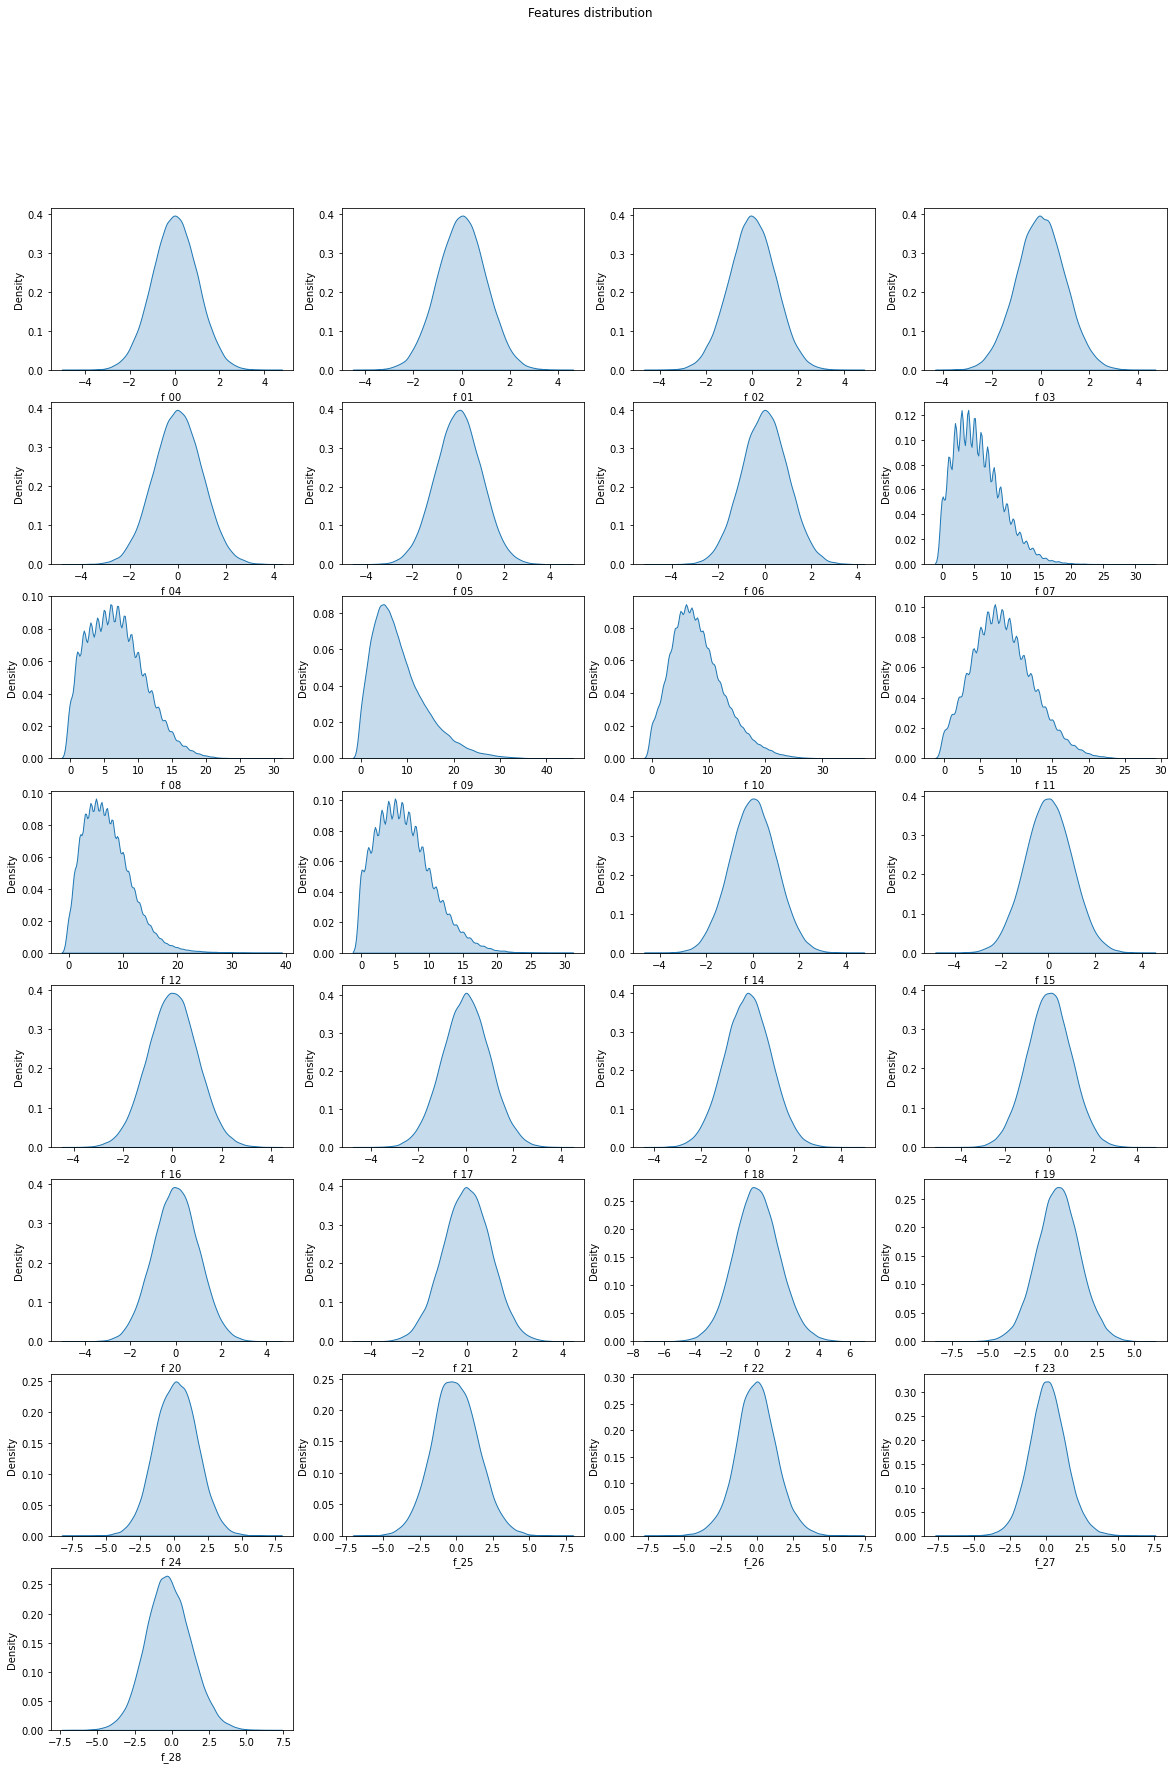

In [ ]:
cols = list(data.columns)

plt.figure(figsize=(20,28))
for index,col in enumerate(cols):
    plt.subplot(8,4,index+1)
    sns.kdeplot(x = data[col],shade="fill")
plt.suptitle("Features distribution")
plt.show()

### Check for null values

In [ ]:
data.isnull().sum().sum()

0

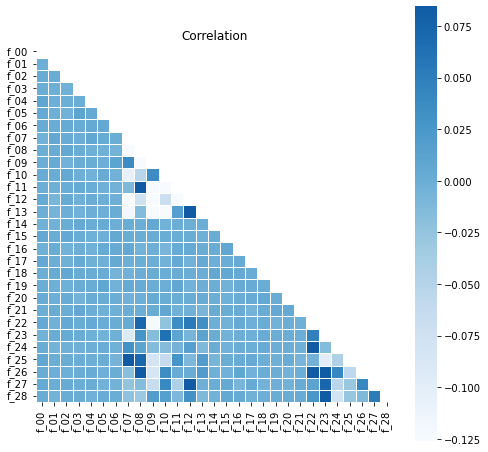

In [ ]:
plt.figure(figsize=(8,8))
corr = data.corr()
mask = np.triu(np.ones_like(corr, dtype=bool)) #这部分就是对应要被遮掉的部分mask
sns.heatmap(corr, mask=mask, robust=True, center=0,square=True, linewidths=.6,cmap='Blues')
plt.title('Correlation')
plt.show()

### RobustScaler
Scale features using statistics that are robust to outliers.  
This Scaler removes the median and scales the data according to the quantile range (defaults to IQR: Interquartile Range). IQR = Q3 - Q1  
If your data contains many outliers, scaling using the mean and variance of the data is likely to not work very well. In these cases, you can use robust_scale and RobustScaler as drop-in replacements instead. They use more robust estimates for the center and range of your data.
### PowerTransformer
Apply a power transform featurewise to make data more Gaussian-like.  
This is useful for modeling issues related to heteroscedasticity (non-constant variance), or other situations where normality is desired.  
‘yeo-johnson’, works with positive and negative values.  
‘box-cox’, only works with strictly positive values  

In [3]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler,PowerTransformer

scaler = RobustScaler() 
scaled_data = scaler.fit_transform(data)

# Transforming data with Power Transformer
power_transformer = PowerTransformer() # default='yeo-johnson'
transformed_data = power_transformer.fit_transform(scaled_data)

data_transformed = pd.DataFrame(transformed_data,columns=data.columns)
data_transformed

,f_00,f_01,f_02,f_03,f_04,f_05,f_06,f_07,f_08,f_09,...,f_19,f_20,f_21,f_22,f_23,f_24,f_25,f_26,f_27,f_28
0,-0.389227,-0.917639,0.647958,0.590737,-0.824837,0.734694,2.259242,-1.033497,1.407376,1.076834,...,-0.472895,-0.753902,-0.763123,-0.707704,0.911425,-0.678993,0.768510,0.960439,1.043167,0.692866
1,-0.688363,-0.458621,0.653191,0.995389,-1.644049,0.864898,-0.085596,-1.033497,-0.922377,-0.198131,...,-0.423562,-0.088141,-1.777640,-0.535662,0.453245,1.031821,-0.118652,-0.551262,0.367902,-1.635096
2,0.805716,0.319426,-1.166998,-0.622397,0.108386,0.785023,1.990353,0.013448,1.033965,-0.439612,...,-0.408392,-1.598661,1.194351,2.203942,0.086177,-1.518865,-0.568497,0.979032,-0.926147,-2.297124
3,-0.500465,0.224026,0.262743,0.234059,0.417056,-1.218795,0.144463,0.294264,-1.240713,0.957816,...,0.620290,1.283818,0.532909,0.731578,-1.217686,0.826754,-1.172432,-0.395774,-0.099899,0.324430
4,-0.670421,-1.044478,-0.270789,-1.833392,-0.285943,-1.849318,0.787663,0.779194,0.179779,-0.439612,...,-1.615002,-0.432379,0.321957,0.227623,-1.481688,0.848269,-0.613662,1.164903,-0.374124,-1.158148
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97995,0.236082,1.648960,-0.688337,0.316102,-0.294846,0.330230,1.611058,0.013448,0.179779,0.213699,...,-0.285656,-0.255950,-0.972205,0.953153,0.407244,1.284161,-0.076272,-0.989589,0.167419,0.457440
97996,0.320927,0.704647,0.561492,-1.322127,-0.353324,0.183156,0.184238,-0.651539,0.628765,-1.302947,...,0.120258,1.383718,0.341900,1.159516,-0.429922,0.271348,0.783856,0.140914,0.693482,0.638176
97997,-0.249519,-0.464213,1.889941,-1.340811,0.197702,-0.557868,-0.375831,0.779194,0.628765,0.548171,...,-0.842339,-1.783922,-1.265085,-0.995376,1.450944,0.867385,0.179693,1.540546,1.179070,0.583192
97998,0.309674,2.175497,0.760601,0.438841,0.466872,0.063501,-0.329884,-1.446155,0.410794,0.694900,...,-0.007736,1.115802,1.571774,0.277521,0.512194,0.687666,-0.286704,-1.085032,-0.538376,0.127070


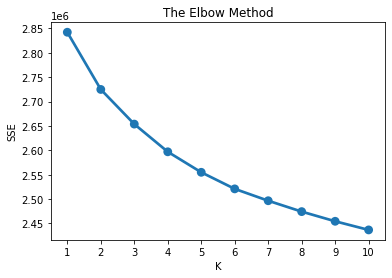

In [ ]:
#use elbow method to determine the number of clustering
from sklearn.cluster import KMeans
import seaborn as sns

#fit KMeans and calculate SSE for each K
sse = []
for k in range(1,11):
	kmeans = KMeans(n_clusters = k, random_state=1)
	kmeans.fit(transformed_data)
	sse.append(kmeans.inertia_) 

#plot SSE for each K
plt.title('The Elbow Method')
plt.xlabel('K'); plt.ylabel('SSE')
sns.pointplot(x= list(range(1,11)) , y = sse)
plt.show()

In [4]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from sklearn.metrics import balanced_accuracy_score, roc_auc_score

all_scores = []
best_features = [f"f_{i:02d}" for i in list(range(7, 14)) + list(range(22, 29))]
#best_features = [f"f_{i:02d}" for i in list(range(29))]
features = data.columns

def scores(preds, lib, df=data[best_features], verbose=True, compute_silhouette=True): 
    # Silhouette is very slow
    sil = 0
    if compute_silhouette:
        sil = silhouette_score(df, preds, metric='euclidean')
    
    s = (lib,
         sil, 
         calinski_harabasz_score(df, preds), 
         davies_bouldin_score(df, preds))
    
    if verbose:
        print(f"{s[0]} : Silhouette : {s[1]:.1%} | Calinski Harabasz : {s[2]:.1f} | Davis Bouldin : {s[3]:.3f}")
        
    return s
def get_score(labels, preds, probas):
    s = (balanced_accuracy_score(labels, preds),
        roc_auc_score(labels, probas, average="weighted", multi_class="ovo"))
    return s

## Unsupervosed learning

In [5]:
from sklearn.mixture import BayesianGaussianMixture,GaussianMixture
bgm = BayesianGaussianMixture(n_components=7,covariance_type='full',max_iter=1000,random_state=50)
predictions_bgm = bgm.fit_predict(data_transformed)
BGM_predict_proba = bgm.predict_proba(data_transformed)

data_transformed['predict'] = predictions_bgm
all_scores.append(scores(predictions_bgm, lib="BayesianGaussianMixture after powertransformer"))

BayesianGaussianMixture after powertransformer : Silhouette : 5.3% | Calinski Harabasz : 8245.5 | Davis Bouldin : 2.621


In [6]:
data_transformed['predict_proba'] = 0
for n in range(7):
    data_transformed[f'predict_proba_{n}'] = BGM_predict_proba[:, n]
    data_transformed.loc[data_transformed['predict']==n, 'predict_proba'] = data_transformed[f'predict_proba_{n}']
    
    
idxs = np.array([])
for n in range(7):
    median = data_transformed[data_transformed.predict==n]['predict_proba'].median()
    idx = data_transformed[(data_transformed.predict==n) & (data_transformed.predict_proba > 0.7)].index
    idxs = np.concatenate((idxs, idx))
    print(f'Class n{n}  |  Median : {median:.4f}  |  Training data : {len(idx)/len(data_transformed[(data_transformed.predict==n)]):.1%}')
    
X = data_transformed.loc[idxs][best_features].reset_index(drop=True)
y = data_transformed.loc[idxs]['predict'].reset_index(drop=True)

Class n0  |  Median : 0.8882  |  Training data : 73.7%
Class n1  |  Median : 0.9459  |  Training data : 80.6%
Class n2  |  Median : 0.9828  |  Training data : 88.3%
Class n3  |  Median : 0.9199  |  Training data : 76.2%
Class n4  |  Median : 0.9259  |  Training data : 79.3%
Class n5  |  Median : 0.7585  |  Training data : 58.0%
Class n6  |  Median : 0.8652  |  Training data : 72.1%


In [7]:
X.shape

(74301, 14)

## Supervised learning

In [8]:
params_lgb = {
    'objective': 'multiclass',
    'boosting': 'gbdt',
    'learning_rate': 4e-2,
    'verbosity': -1,
    'n_jobs': -1,
    'num_classes':7,
    'random_state':50
}

params_xgb = {
    'booster': 'gbtree',
    'objective': 'multi:softprob',
    'learning_rate': 4e-2,
    'num_class': 7,
    'seed': 50,
    'gpu_id': 0,
    'tree_method': 'gpu_hist',
    'predictor': 'gpu_predictor'
    }

params_ctb = {
    'objective': 'MultiClass',
    'bootstrap_type': 'Poisson',
    #'boosting_type': 'Ordered',  # or 'Plain'
    'classes_count': 7,
    'num_boost_round': 20000,
    'learning_rate': 4e-1,
    'random_seed': 50,
    'task_type': 'GPU'
    
}

In [9]:
from sklearn.metrics import balanced_accuracy_score, roc_auc_score

def get_score(labels, preds, probas):
    s = (balanced_accuracy_score(labels, preds),
        roc_auc_score(labels, probas, average="weighted", multi_class="ovo"))
    return s

In [10]:
pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 76.6 MB 1.1 MB/s 


In [11]:
import gc
import lightgbm as lgb
import xgboost as xgb
from catboost import CatBoost, Pool
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import StratifiedKFold

lgb_predict_proba = 0
xgb_predict_proba = 0
ctb_predict_proba = 0
etc_predict_proba = 0
qda_predict_proba = 0
lda_predict_proba = 0
gnb_predict_proba = 0
lrg_predict_proba = 0
svc_predict_proba = 0
knc_predict_proba = 0
classif_scores = []

skf = StratifiedKFold(5, shuffle=True, random_state=50)

for fold, (trn_idx, val_idx) in enumerate(skf.split(X, y)):
    print(f"===== fold{fold} =====")
    X_train, y_train = X.iloc[trn_idx], y.iloc[trn_idx]
    X_valid, y_valid = X.iloc[val_idx], y.iloc[val_idx]

    # LightGBM
    lgb_train = lgb.Dataset(X_train, y_train)
    lgb_valid = lgb.Dataset(X_valid, y_valid)

    ES = lgb.early_stopping(stopping_rounds=500, verbose=False)
    model = lgb.train(params=params_lgb, 
                      train_set=lgb_train,
                      valid_sets=lgb_valid, 
                      num_boost_round = 20000, 
                      callbacks = [ES])

    y_pred_proba = model.predict(X_valid)
    y_pred = np.argmax(y_pred_proba, axis=1)

    s = get_score(y_valid, y_pred, y_pred_proba)
    print(f"LightGBM   AUC : {s[1]:.3f} | Accuracy : {s[0]:.1%}")
    classif_scores.append(s)

    lgb_predict_proba += model.predict(data_transformed[best_features]) / 5

    del lgb_train, lgb_valid, model, s, y_pred, y_pred_proba
    gc.collect()

    # XGBoost
    xgb_train = xgb.DMatrix(X_train, label=y_train)
    xgb_valid = xgb.DMatrix(X_valid, label=y_valid)

    model = xgb.train(params_xgb,
                      dtrain=xgb_train,
                      evals=[(xgb_train, 'train'),(xgb_valid, 'eval')],
                      verbose_eval=False,
                      num_boost_round=20000,
                      early_stopping_rounds=500,
                     )

    y_pred_proba = model.predict(xgb_valid)
    y_pred = np.argmax(y_pred_proba, axis=1)

    s = get_score(y_valid, y_pred, y_pred_proba)
    print(f"XGBoost    AUC : {s[1]:.3f} | Accuracy : {s[0]:.1%}")
    classif_scores.append(s)

    xgb_predict_proba += model.predict(
        xgb.DMatrix(data_transformed[best_features])) / 5

    del xgb_train, xgb_valid, model, s, y_pred, y_pred_proba
    gc.collect()
    
    # catboost
    ctb_train = Pool(X_train, y_train)
    ctb_valid = Pool(X_valid, y_valid)
    
    model = CatBoost(params_ctb)
    model.fit(ctb_train,
              eval_set=[ctb_valid],
              verbose_eval=False,
              early_stopping_rounds=500,
              use_best_model=True
             )
    
    y_pred_proba = model.predict(ctb_valid, prediction_type='Probability')
    y_pred = np.argmax(y_pred_proba, axis=1)
    
    s = get_score(y_valid, y_pred, y_pred_proba)
    print(f"CatBoost   AUC : {s[1]:.3f} | Accuracy : {s[0]:.1%}")
    classif_scores.append(s)

    ctb_predict_proba += model.predict(Pool(data_transformed[best_features]),  prediction_type='Probability') / 5
    
    del ctb_train, ctb_valid, model, s, y_pred, y_pred_proba
    gc.collect()
    
    # ExtraTreesClassifier
    model = ExtraTreesClassifier(n_estimators=300, random_state=50)
    model.fit(X_train, y_train)

    y_pred = model.predict(X_valid)
    y_pred_proba = model.predict_proba(X_valid)

    s = get_score(y_valid, y_pred, y_pred_proba)
    print(f"ExtraTree  AUC : {s[1]:.3f} | Accuracy : {s[0]:.1%}")
    classif_scores.append(s)

    etc_predict_proba += model.predict_proba(data_transformed[best_features]) / 5

    del model, s, y_pred, y_pred_proba
    gc.collect()

    # QuadraticDiscriminantAnalysis
    model = QuadraticDiscriminantAnalysis(priors=7)
    model.fit(X_train, y_train)

    y_pred = model.predict(X_valid)
    y_pred_proba = model.predict_proba(X_valid)

    s = get_score(y_valid, y_pred, y_pred_proba)
    print(f"QDA        AUC : {s[1]:.3f} | Accuracy : {s[0]:.1%}")
    classif_scores.append(s)

    qda_predict_proba += model.predict_proba(data_transformed[best_features]) / 5

    del model, s, y_pred, y_pred_proba
    gc.collect()

    # Linear Discriminant Analysis
    model = LinearDiscriminantAnalysis()
    model.fit(X_train, y_train)

    y_pred = model.predict(X_valid)
    y_pred_proba = model.predict_proba(X_valid)

    s = get_score(y_valid, y_pred, y_pred_proba)
    print(f"LDA        AUC : {s[1]:.3f} | Accuracy : {s[0]:.1%}")
    classif_scores.append(s)

    lda_predict_proba += model.predict_proba(data_transformed[best_features]) / 5

    del model, s, y_pred, y_pred_proba
    gc.collect()

    # Gaussian Naïve Bayes
    model = GaussianNB(var_smoothing=.1)
    model.fit(X_train, y_train)

    y_pred = model.predict(X_valid)
    y_pred_proba = model.predict_proba(X_valid)

    s = get_score(y_valid, y_pred, y_pred_proba)
    print(f"GaussianNB AUC : {s[1]:.3f} | Accuracy : {s[0]:.1%}")
    classif_scores.append(s)

    gnb_predict_proba += model.predict_proba(data_transformed[best_features]) / 5

    del model, s, y_pred, y_pred_proba
    gc.collect()

    # Logistic Regression
    model = LogisticRegression(random_state=50, n_jobs=-1)
    model.fit(X_train, y_train)

    y_pred = model.predict(X_valid)
    y_pred_proba = model.predict_proba(X_valid)

    s = get_score(y_valid, y_pred, y_pred_proba)
    print(f"LogisticR  AUC : {s[1]:.3f} | Accuracy : {s[0]:.1%}")
    classif_scores.append(s)

    lrg_predict_proba += model.predict_proba(data_transformed[best_features]) /5

    del model, s, y_pred, y_pred_proba
    gc.collect()

    # SVC
    model = SVC(probability=True)
    model.fit(X_train, y_train)

    y_pred = model.predict(X_valid)
    y_pred_proba = model.predict_proba(X_valid)

    s = get_score(y_valid, y_pred, y_pred_proba)
    print(f"SVC        AUC : {s[1]:.3f} | Accuracy : {s[0]:.1%}")
    classif_scores.append(s)

    svc_predict_proba += model.predict_proba(data_transformed[best_features]) / 5

    del model, s, y_pred, y_pred_proba
    gc.collect()

    # KNeighborsClassifier
    model = KNeighborsClassifier(n_neighbors=20)
    model.fit(X_train, y_train)

    y_pred = model.predict(X_valid)
    y_pred_proba = model.predict_proba(X_valid)

    s = get_score(y_valid, y_pred, y_pred_proba)
    print(f"KNeighbors AUC : {s[1]:.3f} | Accuracy : {s[0]:.1%}")
    classif_scores.append(s)

    knc_predict_proba += model.predict_proba(data_transformed[best_features]) / 5
    del model, s, y_pred, y_pred_proba
    gc.collect()

all_scores.append(scores(np.argmax(lgb_predict_proba, axis=1), lib="LightGBM"))
all_scores.append(scores(np.argmax(xgb_predict_proba, axis=1), lib="XGBoost"))
all_scores.append(scores(np.argmax(ctb_predict_proba, axis=1), lib="CatBoost"))
all_scores.append(scores(np.argmax(etc_predict_proba, axis=1), lib="ExtraTrees"))
all_scores.append(scores(np.argmax(qda_predict_proba, axis=1), lib="QuadraticDiscriminantAnalysis"))
all_scores.append(scores(np.argmax(lda_predict_proba, axis=1), lib="LinearDiscriminantAnalysis"))
all_scores.append(scores(np.argmax(gnb_predict_proba, axis=1), lib="GaussianNaïveBayes"))
all_scores.append(scores(np.argmax(lrg_predict_proba, axis=1), lib="LogisticRegression"))
all_scores.append(scores(np.argmax(svc_predict_proba, axis=1), lib="SVC"))
all_scores.append(scores(np.argmax(knc_predict_proba, axis=1), lib="KNeighbors"))

pd.DataFrame(classif_scores, columns = ["balanced_accuracy_score", "roc_auc_score"]).mean(0)

串流輸出內容已截斷至最後 5000 行。
[2480]	valid_0's multi_logloss: 0.0291188
[2481]	valid_0's multi_logloss: 0.0291242
[2482]	valid_0's multi_logloss: 0.0291129
[2483]	valid_0's multi_logloss: 0.0291108
[2484]	valid_0's multi_logloss: 0.0291041
[2485]	valid_0's multi_logloss: 0.0291174
[2486]	valid_0's multi_logloss: 0.029125
[2487]	valid_0's multi_logloss: 0.0291222
[2488]	valid_0's multi_logloss: 0.0291172
[2489]	valid_0's multi_logloss: 0.0291229
[2490]	valid_0's multi_logloss: 0.0291269
[2491]	valid_0's multi_logloss: 0.0291255
[2492]	valid_0's multi_logloss: 0.0291165
[2493]	valid_0's multi_logloss: 0.0291331
[2494]	valid_0's multi_logloss: 0.0291308
[2495]	valid_0's multi_logloss: 0.0291259
[2496]	valid_0's multi_logloss: 0.0291393
[2497]	valid_0's multi_logloss: 0.0291389
[2498]	valid_0's multi_logloss: 0.029143
[2499]	valid_0's multi_logloss: 0.0291391
[2500]	valid_0's multi_logloss: 0.0291327
[2501]	valid_0's multi_logloss: 0.0291251
[2502]	valid_0's multi_logloss: 0.0291256
[2503]	valid_0'

balanced_accuracy_score    0.942339
roc_auc_score              0.994612
dtype: float64

## Soft voting

In [16]:
def soft_voting(preds_probas):
    pred_test = np.zeros((data.shape[0],7))
    
    for i, p in enumerate(preds_probas):
        pred_test += p[0] * p[1]
    
    return np.argmax(pred_test, axis=1)

In [17]:
sv_predict = soft_voting((
    (lgb_predict_proba, 0.0),
    (xgb_predict_proba, 0.75),
    (ctb_predict_proba, 0.0),
    (etc_predict_proba, 1.0),
    (qda_predict_proba, 1.0),
    (lda_predict_proba, 0.0),
    (gnb_predict_proba, 0.0),
    (lrg_predict_proba, 0.0),
    (svc_predict_proba, 1.0),
    (knc_predict_proba, 1.0),
))
all_scores.append(scores(sv_predict, lib="Soft voting"))

Soft voting : Silhouette : 5.7% | Calinski Harabasz : 8499.0 | Davis Bouldin : 2.542


In [18]:
all_scores_df = pd.DataFrame(all_scores, columns=["Model", "silhouette", "Calinski_Harabasz", "Davis_Bouldin"])
all_scores_df.to_csv("scores.csv", index=False)
all_scores_df

,Model,silhouette,Calinski_Harabasz,Davis_Bouldin
0,BayesianGaussianMixture after powertransformer,0.052523,8245.497726,2.620707
1,LightGBM,0.055844,8428.021002,2.556504
2,XGBoost,0.056108,8441.372000,2.554932
3,CatBoost,0.055231,8389.430327,2.569697
4,ExtraTrees,0.061652,8710.580550,2.477047
5,QuadraticDiscriminantAnalysis,0.057528,8500.212369,2.546480
6,LinearDiscriminantAnalysis,0.085441,10168.396967,2.178065
7,GaussianNaïveBayes,0.074978,9661.423142,2.287856
8,LogisticRegression,0.080514,9871.831788,2.233903
9,SVC,0.055986,8451.015472,2.564861


## Submission

In [21]:
submission['Predicted'] = sv_predict
submission.to_csv("/content/drive/My Drive/Colab Notebooks/submission.csv", index=False)

In [ ]:
pred_new = pd.DataFrame(pred_seed).rename( columns = pred_dict )
pred_new

,0,3,4,5,1,6,2
0,0.000300,0.988142,2.058964e-09,0.001569,3.000022e-03,0.005748,0.001241
1,0.005557,0.000259,1.018950e-02,0.011906,2.660748e-06,0.920714,0.051372
2,0.000794,0.917295,1.238093e-11,0.000067,8.175440e-02,0.000079,0.000010
3,0.013406,0.000007,9.121754e-01,0.000020,6.087078e-02,0.006894,0.006627
4,0.988202,0.000001,3.989177e-08,0.000060,2.179143e-06,0.011732,0.000002
...,...,...,...,...,...,...,...
97995,0.084596,0.012748,2.674885e-04,0.001168,1.624092e-01,0.488583,0.250227
97996,0.442417,0.000593,7.018629e-11,0.004817,4.410571e-06,0.028604,0.523565
97997,0.021154,0.001558,5.466963e-06,0.000414,9.724645e-01,0.004277,0.000126
97998,0.000352,0.000391,1.029241e-02,0.667527,1.982839e-01,0.100096,0.023057


In [ ]:
# Bizen made a hard voting (with mode), I changed it to a soft voting :

values = [0,1,2,3,4,5,6]
pred_test = pd.DataFrame(np.zeros((data_scaled.shape[0],7)), columns = values)

for seed in range(100):
    
    df = pd.DataFrame(index = data.index)
    gmm = BayesianGaussianMixture(n_components=7,random_state = seed,tol = 0.01, covariance_type = 'full',max_iter = 100,n_init=3)
    
    # fitting and probability prediction
    gmm.fit(data_scaled)
    pred_seed = gmm.predict_proba(data_scaled) # predict_proba for probabilities
    
    # the clusters prediction for the current seed :
    MAX = np.argmax(pred_seed, axis=1) #機率最大的位置
    df[f'pred_{seed}'] = MAX #每個seed的預測結果
    
    # Sort of the prediction by same value of cluster (for addition of every seed)
    pred_keys = df[f'pred_{seed}'].value_counts().index.tolist() # [0, 4, 6, 1, 2, 3, 5]
    pred_dict = dict(zip(pred_keys, values)) # {0: 0, 4: 1, 6: 2, 1: 3, 2: 4, 3: 5, 5: 6}
    df[f'pred_{seed}'] = df[f'pred_{seed}'].map(pred_dict)

    pred_new = pd.DataFrame(pred_seed).rename(columns = pred_dict) # 0,3,4,5,1,6,2
    pred_new = pred_new.reindex(sorted(pred_new.columns), axis=1)
    pred_test += pred_new # Soft voting by probabiliy addition

predictions = np.argmax(np.array(pred_test), axis=1)

In [ ]:
def ensemble_model(n_estmator):
    pred = []
    for i in range(n_estmator):
        bgm = BayesianGaussianMixture(n_components=7,covariance_type='full',max_iter=1000)
        predictions_bgm = bgm.fit_predict(data_transformed)
        predictions_bgm = list(predictions_bgm)
        pred.append(predictions_bgm)
        print("model",i)

    predictions = []
    final_pred =[]

    for i in range(len(pred[0])):#98000
        predictions = [] #每個模型的預測值
        for j in range(n_estmator): #第幾個模型
            predictions.append(pred[j][i])
        final_pred.append(predictions)

    vote_result=[]
    for i in range(len(final_pred)): #vote
        vote_result.append(max(set(final_pred[i]), key=final_pred[i].count) )
        
    return vote_result

In [ ]:
pred

[[1,
  0,
  1,
  3,
  2,
  0,
  3,
  1,
  0,
  1,
  2,
  4,
  1,
  5,
  2,
  1,
  3,
  4,
  5,
  2,
  2,
  4,
  2,
  4,
  2,
  5,
  2,
  6,
  6,
  2,
  5,
  4,
  4,
  6,
  1,
  0,
  6,
  1,
  4,
  3,
  2,
  1,
  3,
  1,
  3,
  5,
  2,
  2,
  5,
  2,
  3,
  5,
  4,
  4,
  4,
  6,
  6,
  0,
  3,
  4,
  3,
  3,
  4,
  6,
  1,
  5,
  2,
  4,
  2,
  5,
  0,
  6,
  3,
  1,
  2,
  2,
  1,
  2,
  3,
  1,
  1,
  2,
  5,
  3,
  6,
  5,
  1,
  5,
  0,
  4,
  6,
  2,
  2,
  3,
  3,
  3,
  2,
  3,
  1,
  3,
  2,
  2,
  0,
  1,
  3,
  4,
  4,
  4,
  3,
  4,
  2,
  4,
  3,
  0,
  2,
  4,
  4,
  4,
  4,
  5,
  2,
  5,
  2,
  3,
  4,
  2,
  6,
  4,
  2,
  4,
  0,
  3,
  3,
  5,
  2,
  0,
  3,
  6,
  4,
  3,
  0,
  5,
  3,
  4,
  4,
  1,
  3,
  5,
  1,
  4,
  2,
  5,
  0,
  3,
  2,
  5,
  4,
  1,
  3,
  3,
  5,
  0,
  1,
  4,
  3,
  3,
  5,
  1,
  1,
  2,
  3,
  0,
  5,
  1,
  5,
  2,
  2,
  4,
  2,
  5,
  2,
  4,
  2,
  4,
  0,
  4,
  1,
  3,
  5,
  2,
  4,
  2,
  4,
  5,
  0,
  2,
  1,
  1,
  4,
  6,


In [ ]:
final_pred = []
for i in range(len(pred[0])):#98000
    predictions = [] #每個模型的預測值
    for j in range(10): #第幾個模型
        predictions.append(pred[j][i])
    final_pred.append(predictions)


vote_result=[]
for i in range(len(final_pred)): #vote
    vote_result.append(max(set(final_pred[i]), key=final_pred[i].count) )

In [ ]:
result = ensemble_model(10)

model 0
model 1
model 2
model 3
model 4
model 5
model 6
model 7
model 8
model 9


TypeError: 'int' object is not subscriptable

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
reduced_data = pca.fit_transform(scaled_data)

In [ ]:
reduced_df = pd.DataFrame(reduced_data)
reduced_df.columns=['x','y']
reduced_df['cluster'] = result
reduced_df

,x,y,cluster
0,-0.538037,0.178929,1
1,-0.429164,0.267330,3
2,-1.146070,-0.312920,6
3,1.116018,-0.137353,1
4,-0.685953,-0.202734,0
...,...,...,...
97995,-0.143301,-0.193421,3
97996,-1.445028,0.367745,6
97997,0.149391,0.831776,5
97998,0.411766,0.699988,3


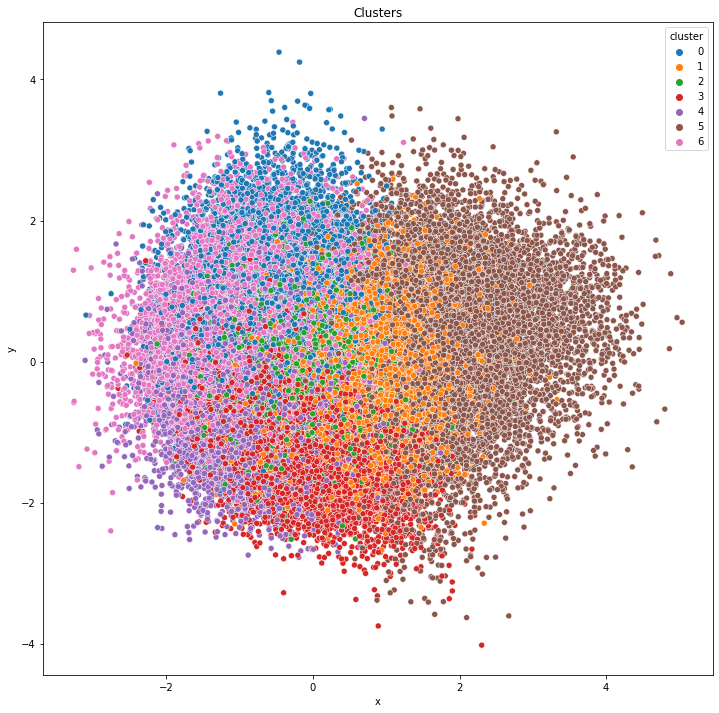

In [ ]:
plt.figure(figsize=(12,12))
sns.scatterplot(x=reduced_df["x"],y=reduced_df["y"],hue=reduced_df["cluster"],palette='tab10')
plt.title("Clusters")
plt.show()

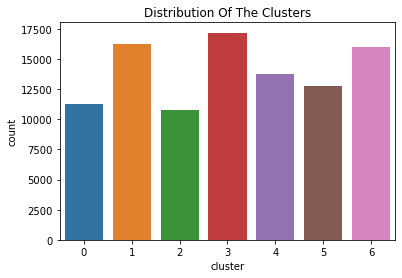

In [ ]:
pl = sns.countplot(x= reduced_df["cluster"])
pl.set_title("Distribution Of The Clusters")
plt.show()

In [ ]:
submission["Predicted"] = vote_result
submission.to_csv("submission_v5.csv", index=False)
submission

,Id,Predicted
0,0,1
1,1,0
2,2,1
3,3,1
4,4,2
...,...,...
97995,97995,0
97996,97996,3
97997,97997,4
97998,97998,6
